In [0]:
# Use seaborn for pairplot
!pip install -q seaborn

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc3


The Auto MPG dataset
The dataset is available from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/

In [4]:
dataset_path = keras.utils.get_file("auto-mpg.csv", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.csv'

In [0]:
!cp /root/.keras/datasets/auto-mpg.csv /content/

In [6]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [0]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [19]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [7]:
dataset.isna().sum() # hoursepower has 6 missing value 

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna() #drop those rows.

In [9]:
dataset.count

<bound method DataFrame.count of       MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0    18.0          8         307.0  ...          12.0          70       1
1    15.0          8         350.0  ...          11.5          70       1
2    18.0          8         318.0  ...          11.0          70       1
3    16.0          8         304.0  ...          12.0          70       1
4    17.0          8         302.0  ...          10.5          70       1
..    ...        ...           ...  ...           ...         ...     ...
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[392 rows x 8 columns]>

The "Origin" column is really categorical, not numeric. So convert that to a one-hot:

In [0]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [11]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')#Convert categorical variable into dummy/indicator variables.
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


Split the data into train and test

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0


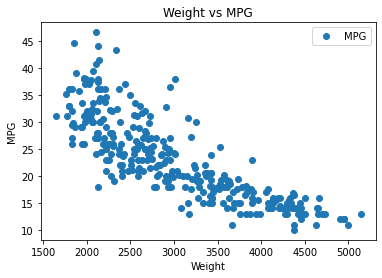

In [0]:
train_dataset.plot(x='Weight', y='MPG', style='o')
plt.title('Weight vs MPG')  
plt.xlabel('Weight')  
plt.ylabel('MPG')  
plt.show()

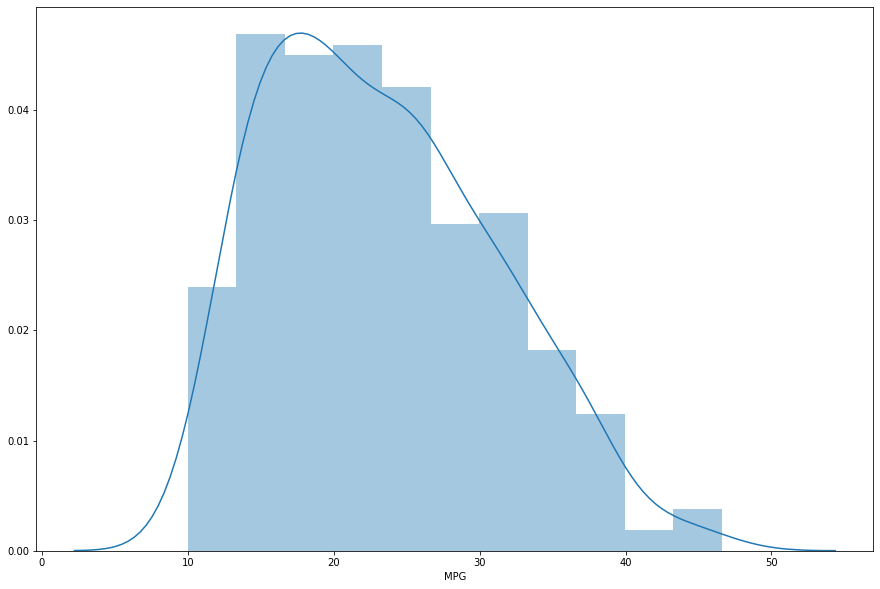

In [0]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(train_dataset['MPG'])

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
X = train_dataset['Weight'].values.reshape(-1,1)#column as 1
y = train_dataset['MPG'].values.reshape(-1,1)

In [0]:
regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[45.76121798]
[[-0.00750797]]


In [0]:
X_test = test_dataset['Weight'].values.reshape(-1,1)#column as 1
y_test = test_dataset['MPG'].values.reshape(-1,1)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
dfcomp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfcomp

,Actual,Predicted
0,15.0,16.855547
1,10.0,11.111953
2,9.0,10.233521
3,25.0,29.033469
4,19.0,25.985235
...,...,...
73,34.0,27.779638
74,36.0,30.895445
75,34.0,28.905833
76,32.0,31.008064


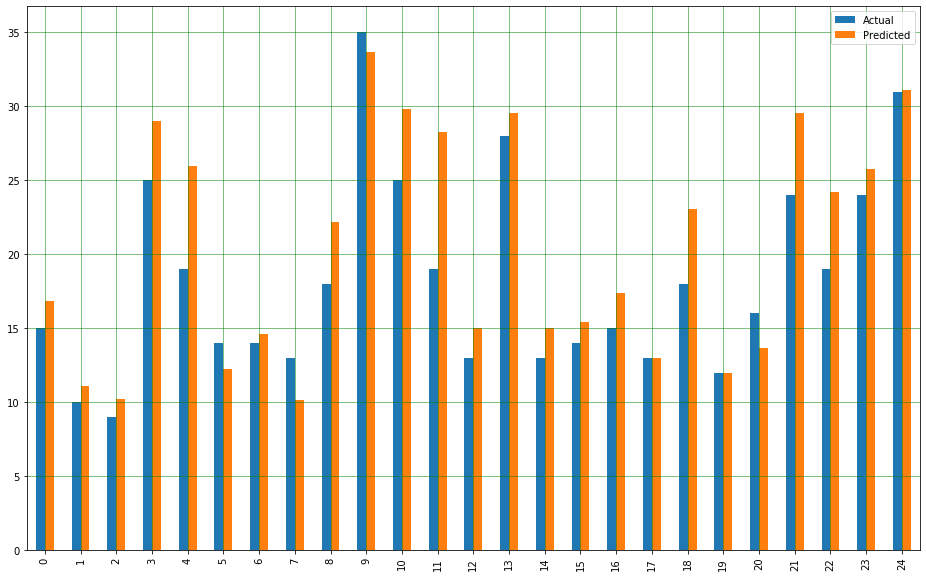

In [0]:
df1 = dfcomp.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

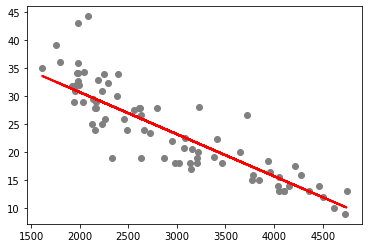

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.9344945081190428
Mean Squared Error: 15.33869208864019
Root Mean Squared Error: 3.916464233034714


#Polynomial Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_test)

In [0]:
model = LinearRegression()
model.fit(x_poly, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.coef_

array([[ 0.00000000e+00, -1.92427663e-02,  1.76575447e-06]])

In [0]:
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_poly_pred))
print(rmse)

3.695197913223615


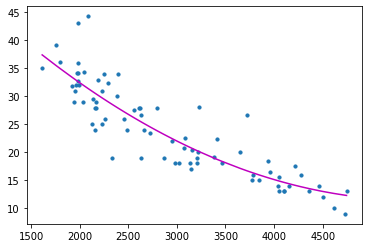

In [0]:
import operator
plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
X_test, y_poly_pred = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred, color='m')
plt.show()

In [0]:
r2 = metrics.r2_score(y_test,y_poly_pred)
print(r2)

-1.8624589267151248


#Multiple Linear Regression

In [0]:
#using sklearn to split the dataset
from sklearn.model_selection import train_test_split 
dataset.isnull().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model Year      False
Europe          False
Japan           False
USA             False
dtype: bool

In [0]:
#MPG	Cylinders	Displacement	Horsepower	Weight	Acceleration	Model Year
columnname=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
Xm = dataset[columnname].values
ym = dataset['MPG'].values

In [0]:
print(dataset.index)
print(dataset.columns)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)
Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')


In [0]:
dataset['MPG'].mean()

23.44591836734694

In [0]:
data_plt = pd.concat([dataset['MPG'], dataset['Cylinders']], axis=1)
data_plt

,MPG,Cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8
4,17.0,8
...,...,...
393,27.0,4
394,44.0,4
395,32.0,4
396,28.0,4


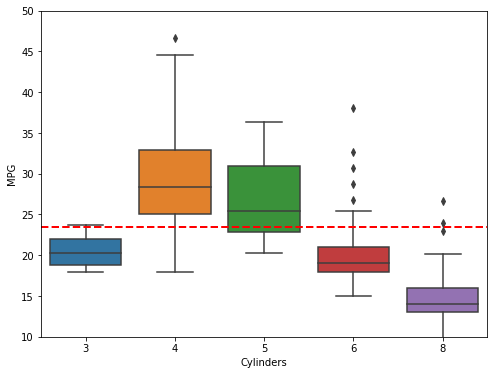

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Cylinders", y="MPG", data=data_plt)
fig.axis(ymin=10, ymax=50)
plt.axhline(dataset['MPG'].mean(),color='r',linestyle='dashed',linewidth=2)

In [0]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=0)

In [0]:
mregressor = LinearRegression()  
mregressor.fit(Xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
mregressor.coef_

array([-0.24724021,  0.00725555,  0.00398814, -0.00706142,  0.14878918,
        0.73921536])

In [0]:
coeff_df = pd.DataFrame(mregressor.coef_, columnname, columns=['Coefficient'])  
coeff_df

,Coefficient
Cylinders,-0.247240
Displacement,0.007256
Horsepower,0.003988
Weight,-0.007061
Acceleration,0.148789
Model Year,0.739215


In [0]:
ym_pred = mregressor.predict(Xm_test)

In [0]:
dfm = pd.DataFrame({'Actual': ym_test, 'Predicted': ym_pred})
df1 = dfm.head(25)

In [0]:
df1

,Actual,Predicted
0,28.0,27.273449
1,22.3,26.398770
2,12.0,10.422526
3,38.0,33.277905
4,33.8,32.107158
5,19.4,23.566027
6,38.1,33.390100
7,30.0,25.225206
8,20.0,21.040899
9,20.0,26.218960


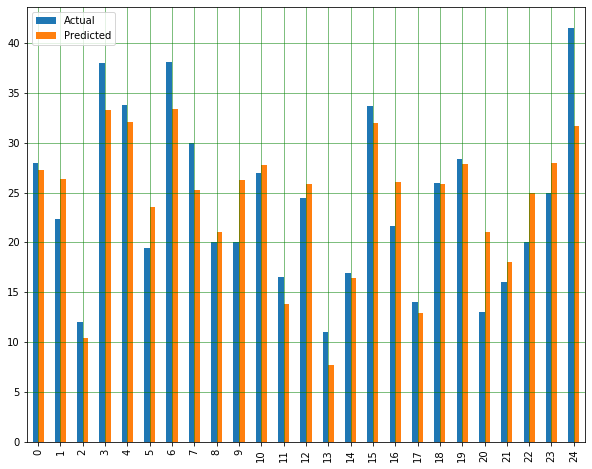

In [0]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ym_test, ym_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ym_test, ym_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ym_test, ym_pred)))

Mean Absolute Error: 2.6724608826273166
Mean Squared Error: 11.8782622888657
Root Mean Squared Error: 3.446485498136573


In [0]:
print(metrics.r2_score(ym_test, ym_pred))

0.8088938602131776


#Additional statistics and Neural Network

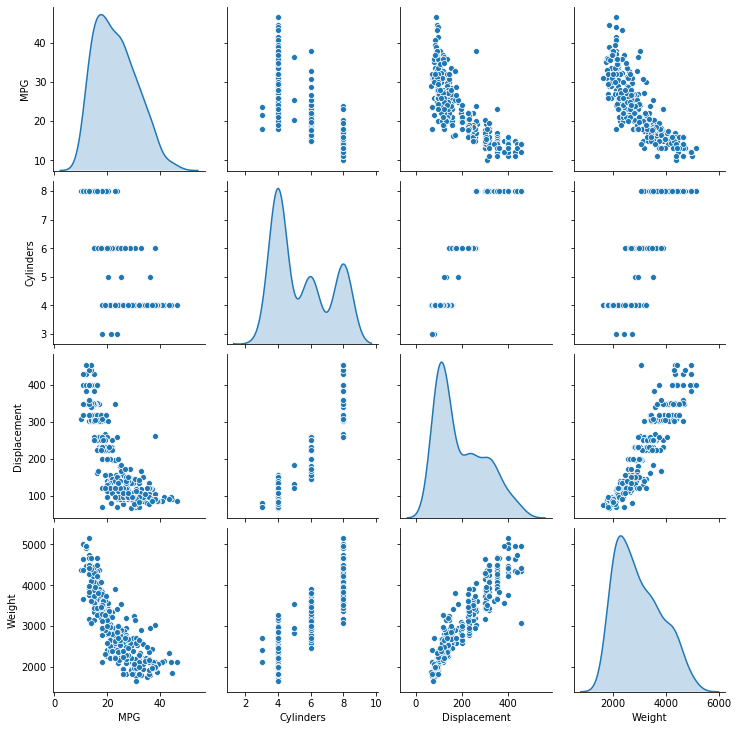

In [0]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [0]:
train_stats = train_dataset.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [0]:
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


Split features from labels

In [0]:
train_labelsnew = train_dataset.pop('MPG')
test_labelsnew = test_dataset.pop('MPG')

Normalize the data

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Build the model

In [0]:
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.03), activation=tf.nn.relu),
    #layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.13686945],
       [-0.21252802],
       [-0.19355762],
       [-0.2703214 ],
       [ 0.07136398],
       [ 0.00470492],
       [-0.00611971],
       [-0.08806728],
       [-0.05945185],
       [ 0.0608112 ]], dtype=float32)

Train the model

In [0]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.465148,-0.495225,0.774676
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.465148,-0.495225,0.774676
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.465148,-0.495225,0.774676
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.465148,-0.495225,0.774676
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-0.465148,2.012852,-1.286751
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,-0.465148,-0.495225,0.774676
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,-0.465148,-0.495225,0.774676
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-0.465148,2.012852,-1.286751
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-0.465148,2.012852,-1.286751


In [0]:
train_labelsnew

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [0]:
EPOCHS = 1000
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

history = model.fit(normed_train_data, train_labelsnew,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,4.179633,1.319551,3.637915,9.917027,2.313431,9.356244,995
996,4.104957,1.334034,3.542500,9.748640,2.337418,9.182067,996
997,4.214208,1.322548,3.659444,9.258924,2.269451,8.700133,997
998,4.369987,1.341622,3.819559,9.370168,2.296313,8.814072,998
999,4.187894,1.317251,3.585609,9.573946,2.289668,9.011666,999


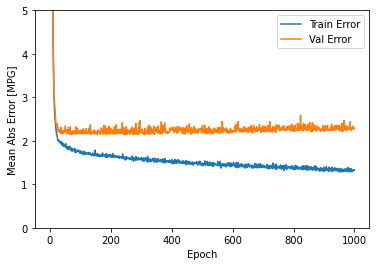

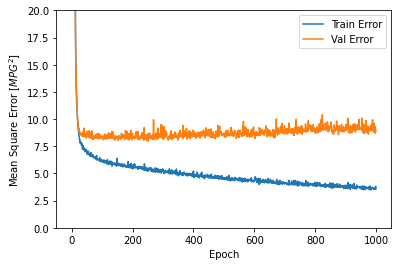

In [0]:
his2= history
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(his2)

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

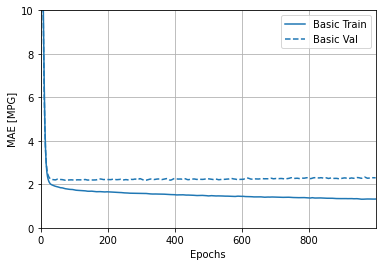

In [0]:
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

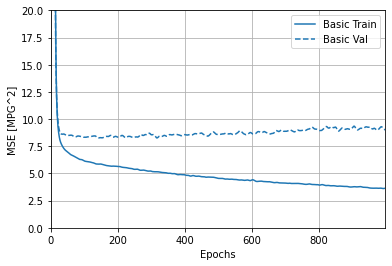

In [0]:
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

EarlyStopping: We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labelsnew, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:569.3421,  mean_absolute_error:22.6416,  mean_squared_error:569.3420,  val_loss:557.1427,  val_mean_absolute_error:22.3701,  val_mean_squared_error:557.1428,  
......................................................................................

Text(0, 0.5, 'MAE [MPG]')

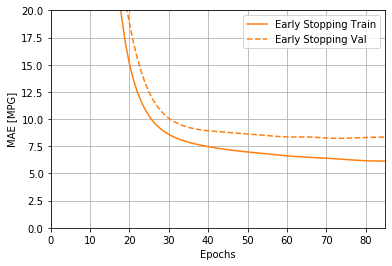

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mean_squared_error")
plt.ylim([0, 20])
plt.ylabel('MAE [MPG]')

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labelsnew, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 5.2659 - mean_absolute_error: 1.7248 - mean_squared_error: 5.2659
Testing set Mean Abs Error:  1.72 MPG


Make predictions

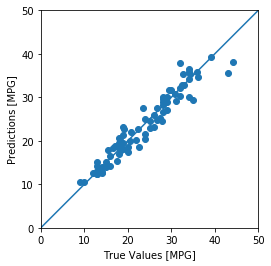

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labelsnew, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


error distribution

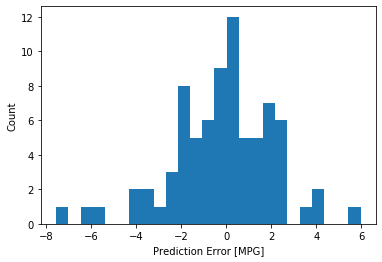

In [0]:
error = test_predictions - test_labelsnew
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# New Section

In [26]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [30]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [0]:

train_label = train_dataset.pop('MPG')

In [0]:
test_label = test_dataset.pop('MPG')

In [0]:
train_stats = train_dataset.describe()


In [36]:
train_stats

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [37]:
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [39]:
train_labelnew=np.array(train_label>35)
train_labelnew

array([False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [40]:
train_labelnew.shape

(314,)

In [44]:
train_dataset.shape[-1]

9

In [0]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_dataset.shape[-1],)),
      keras.layers.Dense(
          32, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics='accuracy')

  return model

In [0]:
model = make_model(METRICS)

In [62]:
BATCH_SIZE=128
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=test_dataset, verbose=0)

ValueError: ignored

In [51]:
test_dataset.shape

(78, 9)

In [52]:
train_dataset.shape

(314, 9)

In [56]:
BATCH_SIZE=128
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=test_dataset, 
    verbose=0)

ValueError: ignored

In [55]:
BATCH_SIZE=128
history = model.fit(
    train_dataset,
    train_labelnew,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(test_dataset, train_labelnew), 
    verbose=0)

ValueError: ignored